<a href="https://colab.research.google.com/github/nalenndra/Manrisk-EVT/blob/Project/Paper_Extended_VaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimasi Value at Risk dengan Extreme Value Theory dan Bayesian Inference Menggunakan Algoritma Metropolis Studi Kasus: Saham LQ45 Sektor Barang Konsumsi

Tugas 5 dan UAS Mata Kuliah Manajemen Risiko \
Mahardi Nalendra Syafa \
NIM 22/502515/PA/21558

# Data

HMSP, ICBP, INDF, and UNVR c

In [151]:
import yfinance as yf
import datetime

# Definisikan simbol saham dan rentang waktU
start_date = "2023-11-15"
end_date = "2024-11-15"

# Mengambil data saham
data_HMSP = yf.download("HMSP.JK", start=start_date, end=end_date)
data_ICBP = yf.download("ICBP.JK", start=start_date, end=end_date)
data_INDF = yf.download("INDF.JK", start=start_date, end=end_date)
data_UNVR = yf.download("UNVR.JK", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [152]:
# new column Log Return from CLuse
import numpy as np
data_HMSP['Log Return'] = np.log(data_HMSP['Close'] / data_HMSP['Close'].shift(1))
data_ICBP['Log Return'] = np.log(data_ICBP['Close'] / data_ICBP['Close'].shift(1))
data_INDF['Log Return'] = np.log(data_INDF['Close'] / data_INDF['Close'].shift(1))
data_UNVR['Log Return'] = np.log(data_UNVR['Close'] / data_UNVR['Close'].shift(1))

In [153]:
data_HMSP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239 entries, 2023-11-15 to 2024-11-14
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, HMSP.JK)  239 non-null    float64
 1   (Close, HMSP.JK)      239 non-null    float64
 2   (High, HMSP.JK)       239 non-null    float64
 3   (Low, HMSP.JK)        239 non-null    float64
 4   (Open, HMSP.JK)       239 non-null    float64
 5   (Volume, HMSP.JK)     239 non-null    int64  
 6   (Log Return, )        238 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 14.9 KB


Time Series Plot of Stock Returns

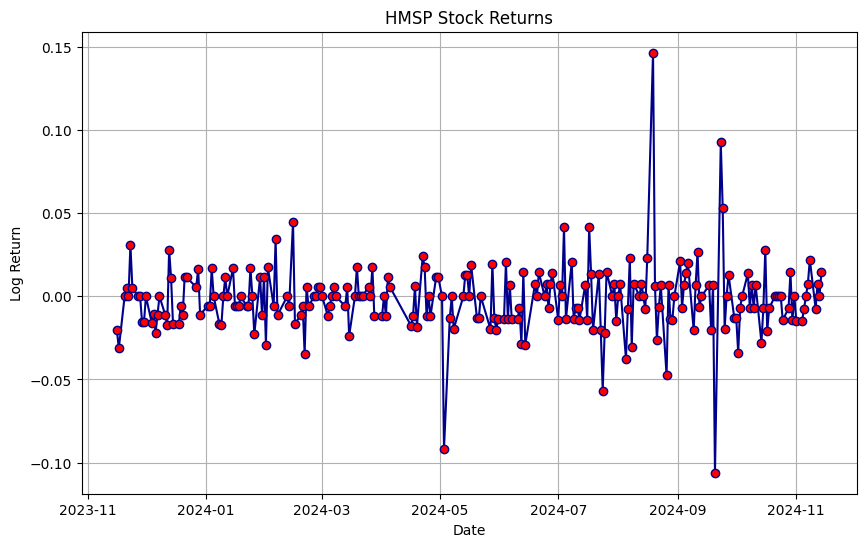

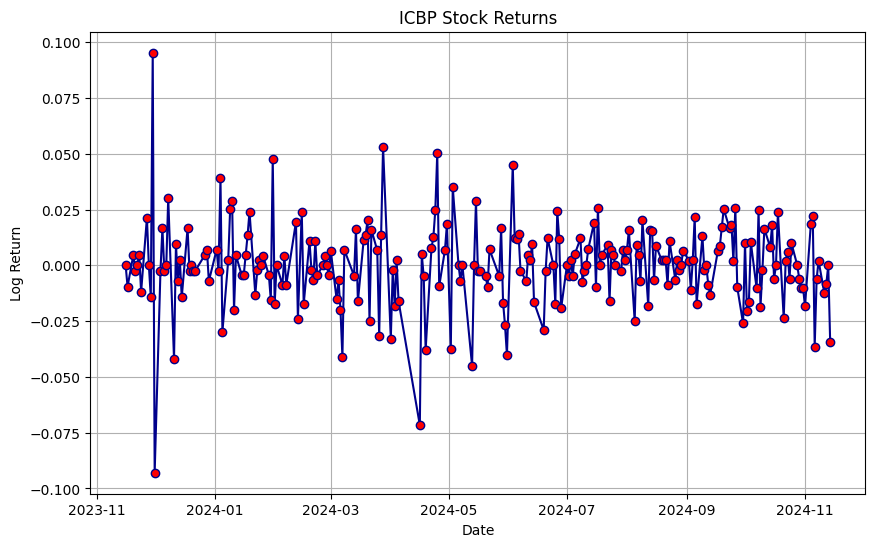

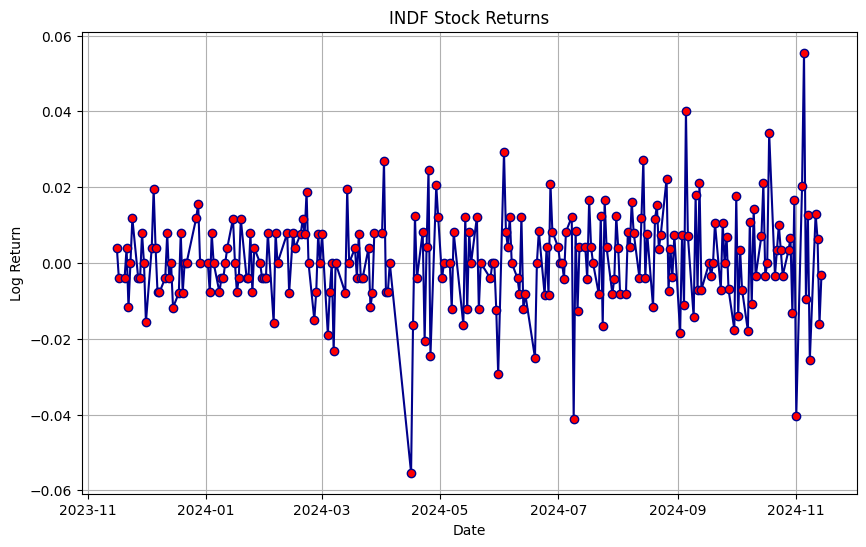

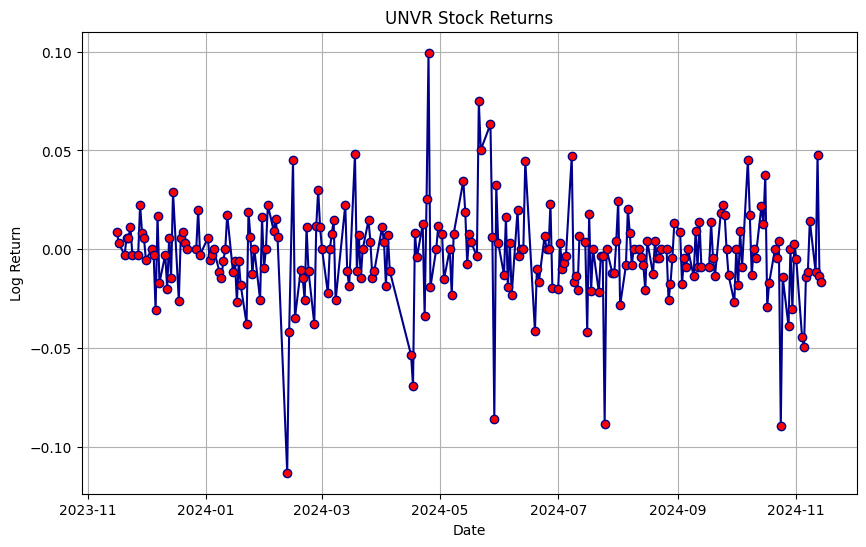

In [154]:
import matplotlib.pyplot as plt

# Plot for HMSP
plt.figure(figsize=(10, 6))
plt.plot(data_HMSP.index, data_HMSP['Log Return'], marker='o', linestyle='-', color='darkblue', markerfacecolor='red')
plt.title('HMSP Stock Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

# Plot for ICBP
plt.figure(figsize=(10, 6))
plt.plot(data_ICBP.index, data_ICBP['Log Return'], marker='o', linestyle='-', color='darkblue', markerfacecolor='red')
plt.title('ICBP Stock Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

# Plot for INDF
plt.figure(figsize=(10, 6))
plt.plot(data_INDF.index, data_INDF['Log Return'], marker='o', linestyle='-', color='darkblue', markerfacecolor='red')
plt.title('INDF Stock Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

# Plot for UNVR
plt.figure(figsize=(10, 6))
plt.plot(data_UNVR.index, data_UNVR['Log Return'], marker='o', linestyle='-', color='darkblue', markerfacecolor='red')
plt.title('UNVR Stock Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

Deskriptif Stat

In [155]:
display(data_HMSP.describe(), data_ICBP.describe(), data_INDF.describe(), data_UNVR.describe())

Price,Adj Close,Close,High,Low,Open,Volume,Log Return
Ticker,HMSP.JK,HMSP.JK,HMSP.JK,HMSP.JK,HMSP.JK,HMSP.JK,
count,239.000000,239.000000,239.000000,239.000000,239.000000,2.390000e+02,238.000000
mean,758.386665,790.083682,803.849372,781.234310,794.790795,2.808644e+07,-0.001508
std,58.358323,89.890183,90.547090,89.474678,91.164030,3.561816e+07,0.021138
min,645.000000,645.000000,655.000000,640.000000,645.000000,4.327900e+06,-0.106107
25%,710.000000,710.000000,725.000000,705.000000,715.000000,1.303970e+07,-0.012903
50%,762.726318,770.000000,780.000000,750.000000,775.000000,1.894370e+07,0.000000
75%,794.889465,865.000000,880.000000,860.000000,875.000000,2.890750e+07,0.007156
max,914.352600,995.000000,1005.000000,980.000000,1000.000000,3.906449e+08,0.146603


Price,Adj Close,Close,High,Low,Open,Volume,Log Return
Ticker,ICBP.JK,ICBP.JK,ICBP.JK,ICBP.JK,ICBP.JK,ICBP.JK,
count,239.000000,239.000000,239.000000,239.000000,239.000000,2.390000e+02,238.000000
mean,10995.787673,11123.535565,11249.790795,10980.020921,11125.104603,5.345175e+06,0.000334
std,757.074371,696.655387,699.140347,688.371983,703.724701,3.218063e+06,0.018935
min,9537.980469,9725.000000,9975.000000,9600.000000,9825.000000,8.031000e+05,-0.092932
25%,10371.634766,10575.000000,10675.000000,10450.000000,10575.000000,3.282700e+06,-0.008112
50%,10900.000000,11000.000000,11150.000000,10875.000000,11000.000000,4.378100e+06,0.000000
75%,11400.000000,11550.000000,11625.000000,11425.000000,11525.000000,6.631000e+06,0.009812
max,12800.000000,12800.000000,12875.000000,12550.000000,12800.000000,1.888010e+07,0.095310


Price,Adj Close,Close,High,Low,Open,Volume,Log Return
Ticker,INDF.JK,INDF.JK,INDF.JK,INDF.JK,INDF.JK,INDF.JK,
count,239.000000,239.000000,239.000000,239.000000,239.000000,2.390000e+02,238.000000
mean,6348.499992,6515.690377,6567.677824,6452.301255,6514.225941,9.083046e+06,0.000761
std,545.094908,461.375415,467.391232,448.116902,456.726716,5.341666e+06,0.012693
min,5621.996094,5875.000000,5950.000000,5850.000000,5900.000000,1.745400e+06,-0.055350
25%,6002.385010,6150.000000,6200.000000,6100.000000,6150.000000,5.429150e+06,-0.007274
50%,6148.310547,6400.000000,6450.000000,6350.000000,6400.000000,7.874600e+06,0.000000
75%,6637.500000,6700.000000,6725.000000,6575.000000,6675.000000,1.080760e+07,0.007866
max,7900.000000,7900.000000,8000.000000,7750.000000,7875.000000,3.109940e+07,0.055479


Price,Adj Close,Close,High,Low,Open,Volume,Log Return
Ticker,UNVR.JK,UNVR.JK,UNVR.JK,UNVR.JK,UNVR.JK,UNVR.JK,
count,239.000000,239.000000,239.000000,239.000000,239.000000,2.390000e+02,238.000000
mean,2652.614799,2760.104603,2805.376569,2727.803347,2769.958159,1.914971e+07,-0.002780
std,440.432031,486.011128,487.831620,479.298427,483.997272,1.392074e+07,0.023822
min,1697.756592,1735.000000,1770.000000,1735.000000,1745.000000,1.810300e+06,-0.113206
25%,2298.847046,2360.000000,2410.000000,2335.000000,2370.000000,9.988600e+06,-0.013699
50%,2593.750244,2720.000000,2740.000000,2680.000000,2720.000000,1.533870e+07,-0.001379
75%,2975.184082,3115.000000,3195.000000,3070.000000,3140.000000,2.318745e+07,0.008034
max,3451.976562,3650.000000,3700.000000,3590.000000,3640.000000,9.343580e+07,0.099486


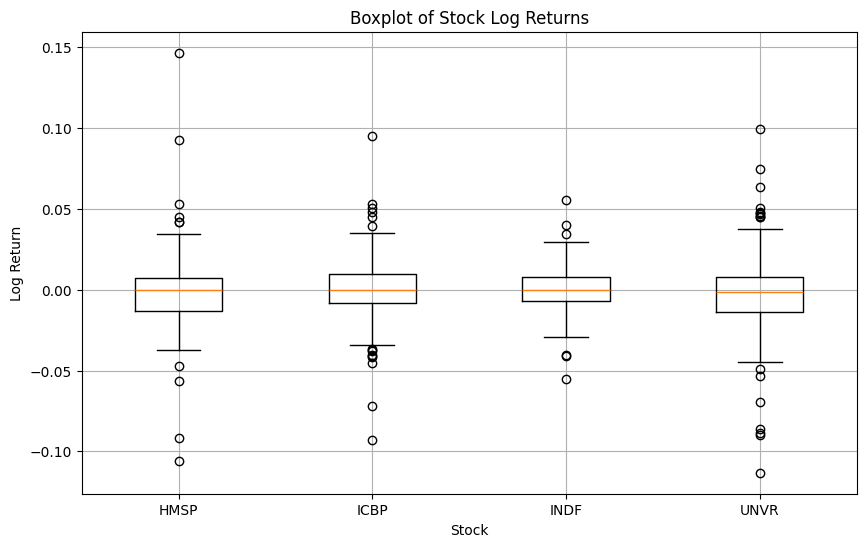

In [156]:
# prompt: Boxplot of Stock log Returns of HMSP, ICBP, INDF and UNVR

import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create a list of log returns for each stock
log_returns_HMSP = data_HMSP['Log Return'].dropna().tolist()
log_returns_ICBP = data_ICBP['Log Return'].dropna().tolist()
log_returns_INDF = data_INDF['Log Return'].dropna().tolist()
log_returns_UNVR = data_UNVR['Log Return'].dropna().tolist()

# Find the minimum length among all lists
min_length = min(len(log_returns_HMSP), len(log_returns_ICBP), len(log_returns_INDF), len(log_returns_UNVR))

# Truncate the lists to the minimum length
log_returns_HMSP = log_returns_HMSP[:min_length]
log_returns_ICBP = log_returns_ICBP[:min_length]
log_returns_INDF = log_returns_INDF[:min_length]
log_returns_UNVR = log_returns_UNVR[:min_length]

# Combine the log returns into a single DataFrame
data_log_returns = pd.DataFrame({
    'HMSP': log_returns_HMSP,
    'ICBP': log_returns_ICBP,
    'INDF': log_returns_INDF,
    'UNVR': log_returns_UNVR
})


# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([data_log_returns['HMSP'], data_log_returns['ICBP'], data_log_returns['INDF'], data_log_returns['UNVR']],
            labels=['HMSP', 'ICBP', 'INDF', 'UNVR'])
plt.title('Boxplot of Stock Log Returns')
plt.xlabel('Stock')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

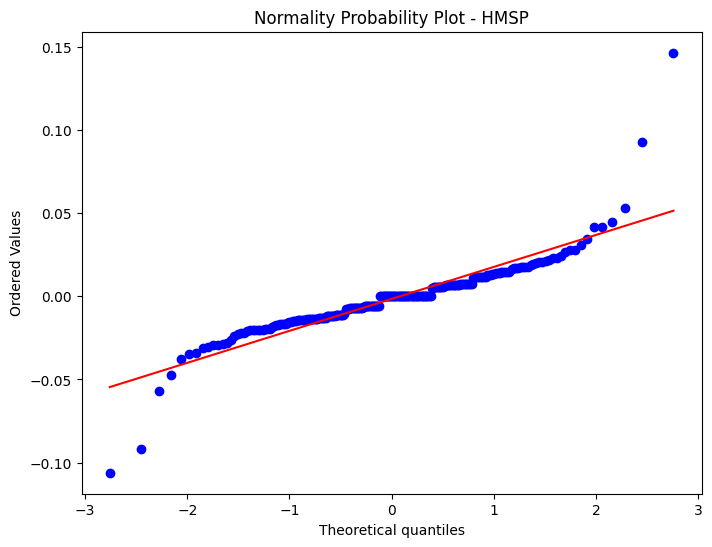

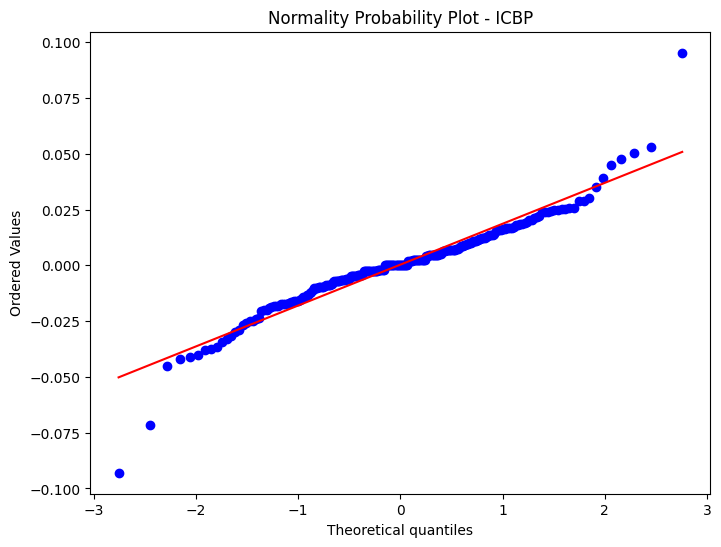

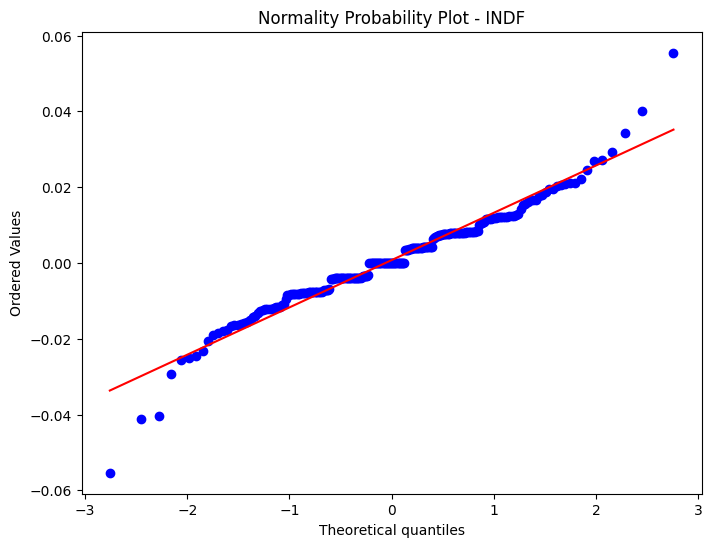

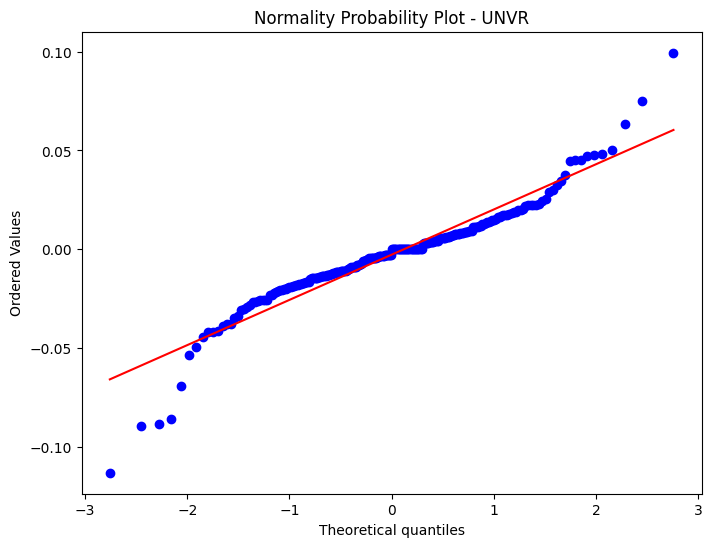

In [157]:
# prompt: . Normality Probability Plot of Stock log Returns, (a) HMSP, (b) ICBP, (c) INDF, (d) UNVR
from scipy.stats import probplot

# Normality Probability Plot for HMSP
plt.figure(figsize=(8, 6))
probplot(data_HMSP['Log Return'].dropna(), dist="norm", plot=plt)
plt.title('Normality Probability Plot - HMSP')
plt.show()

# Normality Probability Plot for ICBP
plt.figure(figsize=(8, 6))
probplot(data_ICBP['Log Return'].dropna(), dist="norm", plot=plt)
plt.title('Normality Probability Plot - ICBP')
plt.show()

# Normality Probability Plot for INDF
plt.figure(figsize=(8, 6))
probplot(data_INDF['Log Return'].dropna(), dist="norm", plot=plt)
plt.title('Normality Probability Plot - INDF')
plt.show()

# Normality Probability Plot for UNVR
plt.figure(figsize=(8, 6))
probplot(data_UNVR['Log Return'].dropna(), dist="norm", plot=plt)
plt.title('Normality Probability Plot - UNVR')
plt.show()

## Descriptve Stat

In [158]:
display(data_log_returns.describe())

,HMSP,ICBP,INDF,UNVR
count,238.000000,238.000000,238.000000,238.000000
mean,-0.001508,0.000334,0.000761,-0.002780
std,0.021138,0.018935,0.012693,0.023822
min,-0.106107,-0.092932,-0.055350,-0.113206
25%,-0.012903,-0.008112,-0.007274,-0.013699
50%,0.000000,0.000000,0.000000,-0.001379
75%,0.007156,0.009812,0.007866,0.008034
max,0.146603,0.095310,0.055479,0.099486


In [159]:
# print skewness and kusrtosis in data_log_returns

print(data_log_returns.skew())
print(data_log_returns.kurt())

HMSP    1.039370
ICBP   -0.156956
INDF   -0.116482
UNVR   -0.383821
dtype: float64
HMSP    14.326777
ICBP     5.330121
INDF     3.155414
UNVR     4.819810
dtype: float64


## KS Test

In [160]:
# prompt: Kolmogorov-Smirnov Test Results log retun each stock Data Normality

from scipy.stats import kstest

# Perform Kolmogorov-Smirnov test for each stock's log returns
ks_results = {}
for stock in ['HMSP', 'ICBP', 'INDF', 'UNVR']:
  ks_statistic, p_value = kstest(data_log_returns[stock], 'norm')
  ks_results[stock] = {'ks_statistic': ks_statistic, 'p_value': p_value}

# Print the results
print("Kolmogorov-Smirnov Test Results for Log Returns:")
for stock, result in ks_results.items():
  print(f"{stock}:")
  print(f"  KS Statistic: {result['ks_statistic']:.4f}")
  print(f"  P-value: {result['p_value']:.4f}")
  if result['p_value'] > 0.05:
    print("  The data is likely normally distributed.")
  else:
    print("  The data is likely not normally distributed.")
  print()

Kolmogorov-Smirnov Test Results for Log Returns:
HMSP:
  KS Statistic: 0.4705
  P-value: 0.0000
  The data is likely not normally distributed.

ICBP:
  KS Statistic: 0.4746
  P-value: 0.0000
  The data is likely not normally distributed.

INDF:
  KS Statistic: 0.4798
  P-value: 0.0000
  The data is likely not normally distributed.

UNVR:
  KS Statistic: 0.4674
  P-value: 0.0000
  The data is likely not normally distributed.



# Block Maxima

In [161]:
import pandas as pd
from scipy.stats import genextreme
import numpy as np

# Assuming data_HMSP, data_ICBP, data_INDF, data_UNVR contain the log return data as calculated
stocks = {'HMSP': data_HMSP, 'ICBP': data_ICBP, 'INDF': data_INDF, 'UNVR': data_UNVR}

# Define function to compute weekly maxima and count blocks
def compute_weekly_max(data):
    # Group by week using resample, then take the max for each weekly block
    weekly_max = data['Log Return'].resample('W').max()
    num_blocks = len(weekly_max.dropna())  # Count of non-NaN blocks
    return weekly_max, num_blocks

# Calculate weekly max log returns and number of blocks for each stock
weekly_max_data = {}
block_counts = {}
for stock, data in stocks.items():
    # Set 'Date' column as the index if not already done
    if not data.index.name == 'Date':
        data.set_index('Date', inplace=True)

    # Ensure the index is of datetime type
    data.index = pd.to_datetime(data.index)

    max_values, num_blocks = compute_weekly_max(data)
    weekly_max_data[stock] = max_values
    block_counts[stock] = num_blocks

# Display the number of blocks (extreme data points) for each stock
print("Number of blocks formed (i.e., extreme data points) for each stock:")
for stock, count in block_counts.items():
    print(f"{stock}: {count} blocks")

# Model the weekly max values with the GEV distribution and show parameter estimates
gev_params = {}
for stock, max_values in weekly_max_data.items():
    params = genextreme.fit(max_values.dropna())  # Fit GEV model, drop NaN from incomplete weeks
    gev_params[stock] = params  # params contains shape, location, and scale parameters

# Display GEV parameter estimates
print("\nGEV Parameter Estimates for Each Stock (shape, location, scale):")
for stock, params in gev_params.items():
    print(f"{stock}: {params}")


Number of blocks formed (i.e., extreme data points) for each stock:
HMSP: 52 blocks
ICBP: 52 blocks
INDF: 52 blocks
UNVR: 52 blocks

GEV Parameter Estimates for Each Stock (shape, location, scale):
HMSP: (-0.045552970624646576, 0.010470941199565337, 0.01454982472251878)
ICBP: (-0.7958536615034953, 0.009442803051997899, 0.011107414154933833)
INDF: (-0.06951803529637554, 0.010413781599420278, 0.0067034847052194965)
UNVR: (-0.08993090173094032, 0.012404691577564686, 0.013371459486027752)


In [162]:
# Perform GEV distribution conformance test (Kolmogorov-Smirnov test)
alpha = 0.05  # Significance level for the test
D_table = 1.36 / np.sqrt(52)  # Critical value for K-S test at alpha = 0.05 and sample size = 52

print("\nConformance Test Results (K-S Test):")
for stock, max_values in weekly_max_data.items():
    # Drop NaN values and use the fitted GEV parameters
    max_values = max_values.dropna()
    shape, loc, scale = gev_params[stock]

    # Define the GEV CDF with the fitted parameters
    cdf_gev = lambda x: genextreme.cdf(x, shape, loc=loc, scale=scale)

    # Perform the K-S test
    D_count, p_value = kstest(max_values, cdf_gev)

    # Check if the distribution conforms to GEV
    conforms = D_count < D_table

    # Output results
    print(f"{stock}:")
    print(f"  D-count = {D_count:.4f}, D-table = {D_table:.4f}, p-value = {p_value:.4f}")
    print(f"  Conforms to GEV: {'Yes' if conforms else 'No'}")


Conformance Test Results (K-S Test):
HMSP:
  D-count = 0.1412, D-table = 0.1886, p-value = 0.2284
  Conforms to GEV: Yes
ICBP:
  D-count = 0.1391, D-table = 0.1886, p-value = 0.2429
  Conforms to GEV: Yes
INDF:
  D-count = 0.1381, D-table = 0.1886, p-value = 0.2502
  Conforms to GEV: Yes
UNVR:
  D-count = 0.1029, D-table = 0.1886, p-value = 0.6036
  Conforms to GEV: Yes


## VaR value GEV

In [163]:
import numpy as np

# Confidence levels and time horizons
confidence_levels = [0.90, 0.95, 0.99]
time_horizons = {'1 day': 1, '1 week': 5, '1 month': 22}  # 5 trading days in a week, 22 in a month

# Calculate VaR for each stock at each confidence level and time horizon
var_results_BM = {}
for stock, params in gev_params.items():
    shape, loc, scale = params  # Extract shape, location, and scale parameters
    var_results_BM[stock] = {}

    for confidence in confidence_levels:
        alpha = 1 - confidence  # Convert confidence level to exceedance probability
        # Calculate VaR for a 1-day horizon
        var_day = loc - (scale / shape) * (1 - (-np.log(1 - alpha)) ** (-shape))

        # Adjust VaR for different time horizons and make the values negative
        var_results_BM[stock][f"VaR at {int(confidence * 100)}%"] = {}
        for horizon_name, horizon_days in time_horizons.items():
            var_horizon = -var_day * np.sqrt(horizon_days)  # Adjust for time horizon and make negative
            var_results_BM[stock][f"VaR at {int(confidence * 100)}%"][horizon_name] = var_horizon

# Display VaR results for each stock
print("VaR Estimates (in percentage terms) for Each Stock at Different Confidence Levels and Time Horizons:")
for stock, var_data in var_results_BM.items():
    print(f"\n{stock}:")
    for confidence, horizons in var_data.items():
        print(f"  {confidence}:")
        for horizon, value in horizons.items():
            print(f"    {horizon}: {value:.4f}")


VaR Estimates (in percentage terms) for Each Stock at Different Confidence Levels and Time Horizons:

HMSP:
  VaR at 90%:
    1 day: -0.0416
    1 week: -0.0930
    1 month: -0.1951
  VaR at 95%:
    1 day: -0.0509
    1 week: -0.1138
    1 month: -0.2387
  VaR at 99%:
    1 day: -0.0709
    1 week: -0.1584
    1 month: -0.3323

ICBP:
  VaR at 90%:
    1 day: -0.0211
    1 week: -0.0471
    1 month: -0.0988
  VaR at 95%:
    1 day: -0.0221
    1 week: -0.0494
    1 month: -0.1036
  VaR at 99%:
    1 day: -0.0230
    1 week: -0.0515
    1 month: -0.1081

INDF:
  VaR at 90%:
    1 day: -0.0244
    1 week: -0.0545
    1 month: -0.1143
  VaR at 95%:
    1 day: -0.0284
    1 week: -0.0635
    1 month: -0.1332
  VaR at 99%:
    1 day: -0.0368
    1 week: -0.0823
    1 month: -0.1726

UNVR:
  VaR at 90%:
    1 day: -0.0396
    1 week: -0.0887
    1 month: -0.1860
  VaR at 95%:
    1 day: -0.0473
    1 week: -0.1057
    1 month: -0.2217
  VaR at 99%:
    1 day: -0.0628
    1 week: -0.1404
    

# POT

## MLE

In [164]:
import pandas as pd
from scipy.stats import genpareto
import numpy as np

# Assuming data_HMSP, data_ICBP, data_INDF, data_UNVR contain the log return data as calculated
stocks = {'HMSP': data_HMSP, 'ICBP': data_ICBP, 'INDF': data_INDF, 'UNVR': data_UNVR}

# Define a function to perform the POT approach
def peaks_over_threshold(data, quantile=0.9):
    # Calculate threshold u based on quantile
    threshold = data['Log Return'].quantile(quantile)

    # Count total observations n
    n = len(data)

    # Get observations above the threshold
    excesses = data[data['Log Return'] > threshold]['Log Return']
    k = len(excesses)  # Number of observations above threshold

    return threshold, n, k, excesses

# Calculate POT values and parameter estimates
pot_results = {}
pot_params = {}
for stock, data in stocks.items():
    # Ensure 'Date' is set as the index if not done already
    if not data.index.name == 'Date':
        data.set_index('Date', inplace=True)

    # Ensure index is datetime
    data.index = pd.to_datetime(data.index)

    # Perform POT calculations
    threshold, n, k, excesses = peaks_over_threshold(data)
    pot_results[stock] = {'Threshold (u)': threshold, 'Total Observations (n)': n, 'Observations above Threshold (k)': k}

    # Estimate GPD parameters for excesses using MLE
    shape, loc, scale = genpareto.fit(excesses, floc=0)  # Fix location at 0 for typical POT modeling
    pot_params[stock] = {'Shape': shape, 'Scale': scale}

# Display results for each stock
print("Peaks Over Threshold Results:")
for stock, results in pot_results.items():
    print(f"{stock}: {results}")

print("\nPeaks Over Threshold GPD Parameter Estimates (Shape and Scale):")
for stock, params in pot_params.items():
    print(f"{stock}: {params}")


Peaks Over Threshold Results:
HMSP: {'Threshold (u)': 0.017422167132563605, 'Total Observations (n)': 239, 'Observations above Threshold (k)': 24}
ICBP: {'Threshold (u)': 0.020261858382907415, 'Total Observations (n)': 239, 'Observations above Threshold (k)': 24}
INDF: {'Threshold (u)': 0.014598839801543697, 'Total Observations (n)': 239, 'Observations above Threshold (k)': 24}
UNVR: {'Threshold (u)': 0.020140873963352946, 'Total Observations (n)': 239, 'Observations above Threshold (k)': 24}

Peaks Over Threshold GPD Parameter Estimates (Shape and Scale):
HMSP: {'Shape': -0.12099294744189534, 'Scale': 0.03880620770788742}
ICBP: {'Shape': -0.403203453949852, 'Scale': 0.04401596714723805}
INDF: {'Shape': -0.5863925317628513, 'Scale': 0.03425188669371643}
UNVR: {'Shape': -0.5345966924675154, 'Scale': 0.05709074402645392}


### MLE parameter test

In [165]:
import pandas as pd
from scipy.stats import genpareto, kstest
import numpy as np

# Assuming data_HMSP, data_ICBP, data_INDF, data_UNVR contain the log return data as calculated
stocks = {'HMSP': data_HMSP, 'ICBP': data_ICBP, 'INDF': data_INDF, 'UNVR': data_UNVR}

# Define a function to perform the POT approach and GPD fitting
def peaks_over_threshold(data, quantile=0.9):
    # Calculate threshold u based on quantile
    threshold = data['Log Return'].quantile(quantile)

    # Get observations above the threshold
    excesses = data[data['Log Return'] > threshold]['Log Return']

    # Estimate GPD parameters for excesses using MLE
    shape, loc, scale = genpareto.fit(excesses, floc=0)  # Fix location at 0 for typical POT modeling

    return threshold, excesses, shape, scale

# Perform POT and test GPD fit
gpd_fit_results = {}
for stock, data in stocks.items():
    # Ensure 'Date' is set as the index if not done already
    if not data.index.name == 'Date':
        data.set_index('Date', inplace=True)

    # Ensure index is datetime
    data.index = pd.to_datetime(data.index)

    # Perform POT calculations
    threshold, excesses, shape, scale = peaks_over_threshold(data)
    gpd_fit_results[stock] = {'Threshold (u)': threshold, 'Shape': shape, 'Scale': scale}

    # Define the GPD CDF with the fitted parameters
    cdf_gpd = lambda x: genpareto.cdf(x, shape, loc=0, scale=scale)

    # Perform the Kolmogorov-Smirnov test
    D_statistic, p_value = kstest(excesses, cdf_gpd)

    # Output results
    print(f"{stock} - Generalized Pareto Distribution Fit Test:")
    print(f"  D-statistic = {D_statistic:.4f}")
    print(f"  p-value = {p_value:.4f}")
    print("  Fit to GPD: " + ("Yes" if p_value > 0.05 else "No"))
    print("  GPD Parameters: Shape =", shape, ", Scale =", scale)
    print()


HMSP - Generalized Pareto Distribution Fit Test:
  D-statistic = 0.3709
  p-value = 0.0018
  Fit to GPD: No
  GPD Parameters: Shape = -0.12099294744189534 , Scale = 0.03880620770788742

ICBP - Generalized Pareto Distribution Fit Test:
  D-statistic = 0.3996
  p-value = 0.0006
  Fit to GPD: No
  GPD Parameters: Shape = -0.403203453949852 , Scale = 0.04401596714723805

INDF - Generalized Pareto Distribution Fit Test:
  D-statistic = 0.4021
  p-value = 0.0005
  Fit to GPD: No
  GPD Parameters: Shape = -0.5863925317628513 , Scale = 0.03425188669371643

UNVR - Generalized Pareto Distribution Fit Test:
  D-statistic = 0.3293
  p-value = 0.0081
  Fit to GPD: No
  GPD Parameters: Shape = -0.5345966924675154 , Scale = 0.05709074402645392



### VaR MLE

In [166]:
import numpy as np

# Confidence levels and time horizons
confidence_levels = [0.90, 0.95, 0.99]
time_horizons = {'1 day': 1, '1 week': 5, '1 month': 22}  # 5 trading days in a week, 22 in a month

# Calculate VaR for each stock at each confidence level and time horizon using the POT approach
var_results_pot = {}
for stock, params in pot_params.items():
    shape, scale = params['Shape'], params['Scale']
    threshold = pot_results[stock]['Threshold (u)']
    n = pot_results[stock]['Total Observations (n)']
    k = pot_results[stock]['Observations above Threshold (k)']

    var_results_pot[stock] = {}
    for confidence in confidence_levels:
        alpha = 1 - confidence  # Convert confidence level to exceedance probability
        # Calculate VaR for a 1-day horizon
        var_day = threshold + (scale / shape) * ((n / k * (1 - alpha)) ** -shape - 1)

        # Adjust VaR for different time horizons
        var_results_pot[stock][f"VaR at {int(confidence * 100)}%"] = {}
        for horizon_name, horizon_days in time_horizons.items():
            var_horizon = var_day * np.sqrt(horizon_days)  # Adjust for time horizon
            var_results_pot[stock][f"VaR at {int(confidence * 100)}%"][horizon_name] = var_horizon

# Display VaR results for each stock
print("VaR Estimates (in percentage terms) for Each Stock at Different Confidence Levels and Time Horizons (POT Approach):")
for stock, var_data in var_results_pot.items():
    print(f"\n{stock}:")
    for confidence, horizons in var_data.items():
        print(f"  {confidence}:")
        for horizon, value in horizons.items():
            print(f"    {horizon}: {value:.4f}")


VaR Estimates (in percentage terms) for Each Stock at Different Confidence Levels and Time Horizons (POT Approach):

HMSP:
  VaR at 90%:
    1 day: -0.0800
    1 week: -0.1790
    1 month: -0.3754
  VaR at 95%:
    1 day: -0.0828
    1 week: -0.1851
    1 month: -0.3883
  VaR at 99%:
    1 day: -0.0849
    1 week: -0.1898
    1 month: -0.3982

ICBP:
  VaR at 90%:
    1 day: -0.1349
    1 week: -0.3016
    1 month: -0.6326
  VaR at 95%:
    1 day: -0.1407
    1 week: -0.3146
    1 month: -0.6600
  VaR at 99%:
    1 day: -0.1452
    1 week: -0.3248
    1 month: -0.6812

INDF:
  VaR at 90%:
    1 day: -0.1383
    1 week: -0.3093
    1 month: -0.6489
  VaR at 95%:
    1 day: -0.1451
    1 week: -0.3246
    1 month: -0.6808
  VaR at 99%:
    1 day: -0.1505
    1 week: -0.3365
    1 month: -0.7058

UNVR:
  VaR at 90%:
    1 day: -0.2180
    1 week: -0.4874
    1 month: -1.0224
  VaR at 95%:
    1 day: -0.2281
    1 week: -0.5100
    1 month: -1.0698
  VaR at 99%:
    1 day: -0.2360
    1 wee

## Metropolis

<ipython-input-167-59827fdbe0f4>:31: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(genpareto.pdf(excesses, shape, scale=scale)))
<ipython-input-167-59827fdbe0f4>:31: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(genpareto.pdf(excesses, shape, scale=scale)))
<ipython-input-167-59827fdbe0f4>:31: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(genpareto.pdf(excesses, shape, scale=scale)))
<ipython-input-167-59827fdbe0f4>:31: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(genpareto.pdf(excesses, shape, scale=scale)))


Metropolis Algorithm Parameter Estimation Results:
HMSP:
  Shape Parameter Mean: -0.014983062069881021
  Scale Parameter Mean: 0.04247797233568331
  Shape Parameter Std: 0.23184032954892464
  Scale Parameter Std: 0.031690939427720576


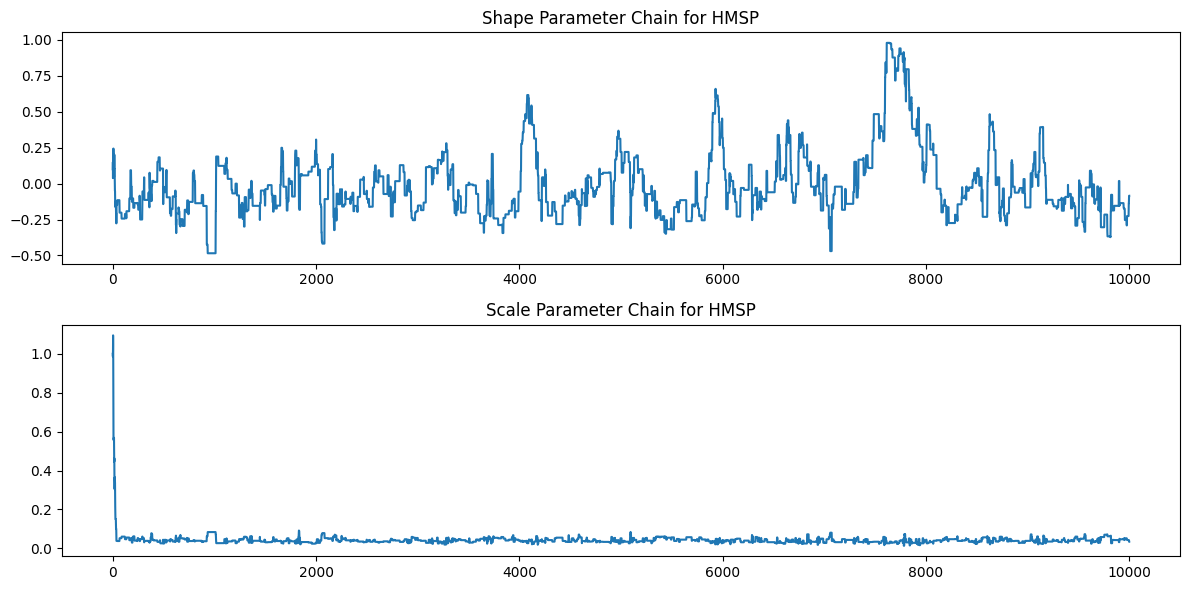

ICBP:
  Shape Parameter Mean: -0.34912337409351824
  Scale Parameter Mean: 0.04804088961653268
  Shape Parameter Std: 0.17010544510112421
  Scale Parameter Std: 0.030586333641093977


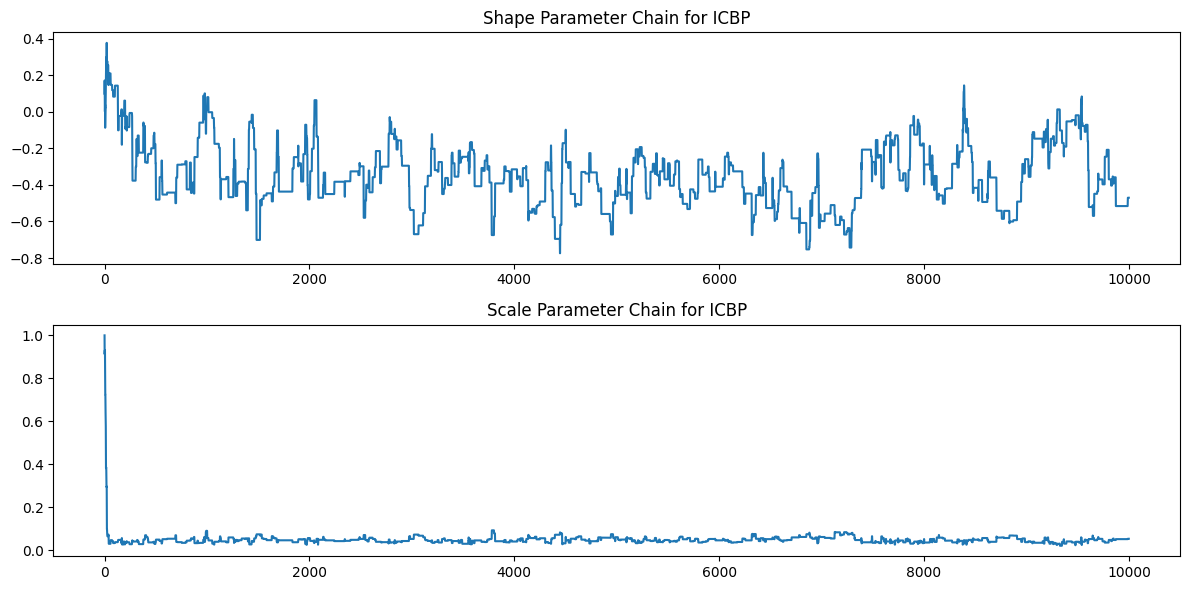

INDF:
  Shape Parameter Mean: -0.5472703585659784
  Scale Parameter Mean: 0.037498150917211925
  Shape Parameter Std: 0.20412348234946948
  Scale Parameter Std: 0.02970218735685079


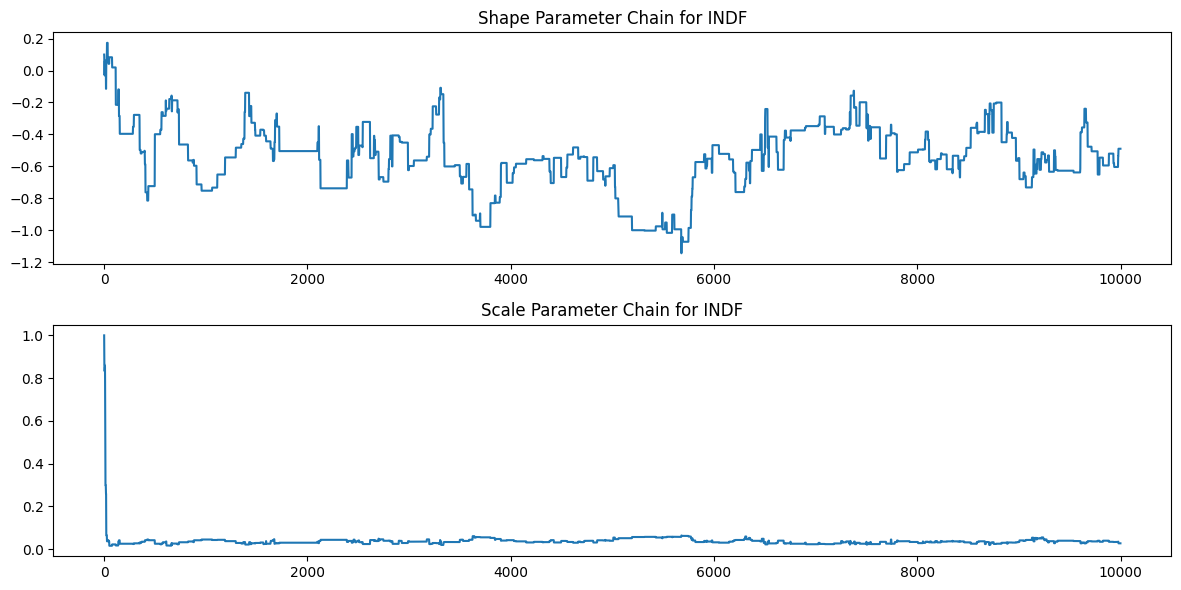

UNVR:
  Shape Parameter Mean: -0.49514871506962926
  Scale Parameter Mean: 0.06327437424563723
  Shape Parameter Std: 0.2562363777037714
  Scale Parameter Std: 0.033265932163713534


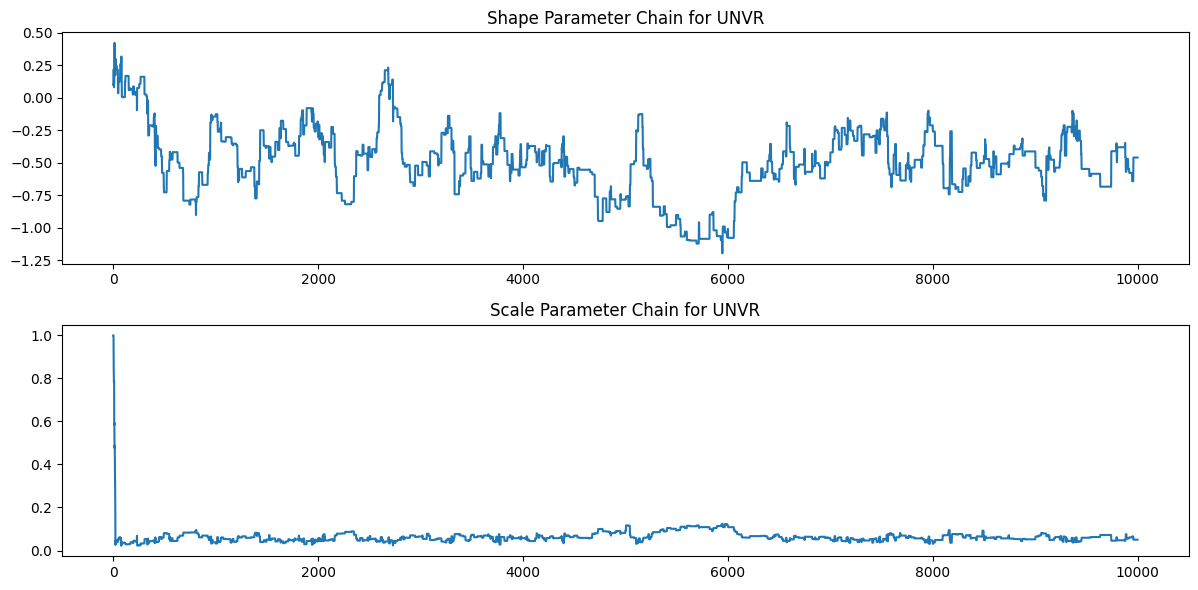

In [167]:
import pandas as pd
import numpy as np
from scipy.stats import genpareto
import matplotlib.pyplot as plt

# seed
np.random.seed(42)

# Assuming data_HMSP, data_ICBP, data_INDF, data_UNVR contain the log return data as calculated
stocks = {'HMSP': data_HMSP, 'ICBP': data_ICBP, 'INDF': data_INDF, 'UNVR': data_UNVR}

# Define a function to perform the POT approach
def peaks_over_threshold(data, quantile=0.9):
    # Calculate threshold u based on quantile
    threshold = data['Log Return'].quantile(quantile)

    # Count total observations n
    n = len(data)

    # Get observations above the threshold
    excesses = data[data['Log Return'] > threshold]['Log Return']
    k = len(excesses)  # Number of observations above threshold

    return threshold, n, k, excesses

# Define log-likelihood function for GPD
def log_likelihood_gpd(params, excesses):
    shape, scale = params
    if scale <= 0:  # To avoid invalid parameters
        return -np.inf
    return np.sum(np.log(genpareto.pdf(excesses, shape, scale=scale)))

# Metropolis algorithm for parameter estimation using MCMC
def metropolis_algorithm(excesses, initial_params, n_iterations=10000, proposal_std=0.1):
    # Initialize parameter chain
    chain = np.zeros((n_iterations, len(initial_params)))
    chain[0] = initial_params
    current_params = initial_params
    current_log_likelihood = log_likelihood_gpd(current_params, excesses)

    for i in range(1, n_iterations):
        # Propose new parameters using a normal distribution
        proposed_params = np.random.normal(current_params, proposal_std)

        # Calculate the log-likelihood for the proposed parameters
        proposed_log_likelihood = log_likelihood_gpd(proposed_params, excesses)

        # Calculate the acceptance ratio
        acceptance_ratio = np.exp(proposed_log_likelihood - current_log_likelihood)

        # Accept or reject the proposed parameters
        if np.random.rand() < acceptance_ratio:
            current_params = proposed_params
            current_log_likelihood = proposed_log_likelihood

        # Store the current parameters in the chain
        chain[i] = current_params

    return chain

# Perform estimation using Metropolis algorithm for each stock
metropolis_results = {}
for stock, data in stocks.items():
    # Ensure 'Date' is set as the index if not done already
    if not data.index.name == 'Date':
        data.set_index('Date', inplace=True)

    # Ensure index is datetime
    data.index = pd.to_datetime(data.index)

    # Perform POT calculations
    threshold, n, k, excesses = peaks_over_threshold(data)

    # Perform Metropolis sampling for GPD parameters
    initial_params = [0.1, 1.0]  # Starting values for shape and scale
    chain = metropolis_algorithm(excesses, initial_params, n_iterations=10000, proposal_std=0.1)

    # Store results
    metropolis_results[stock] = chain

# Display the results for each stock
print("Metropolis Algorithm Parameter Estimation Results:")
for stock, chain in metropolis_results.items():
    shape_chain = chain[:, 0]
    scale_chain = chain[:, 1]
    print(f"{stock}:")
    print(f"  Shape Parameter Mean: {np.mean(shape_chain)}")
    print(f"  Scale Parameter Mean: {np.mean(scale_chain)}")
    print(f"  Shape Parameter Std: {np.std(shape_chain)}")
    print(f"  Scale Parameter Std: {np.std(scale_chain)}")

    # Plot the chains
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(shape_chain, label="Shape")
    plt.title(f"Shape Parameter Chain for {stock}")
    plt.subplot(2, 1, 2)
    plt.plot(scale_chain, label="Scale")
    plt.title(f"Scale Parameter Chain for {stock}")
    plt.tight_layout()
    plt.show()


### Var POT Metropolis

In [168]:
import numpy as np
# set seed
# Confidence levels and time horizons
confidence_levels = [0.90, 0.95, 0.99]
time_horizons = {'1 day': 1, '1 week': 5, '1 month': 22}  # 5 trading days in a week, 22 in a month

# Calculate VaR for each stock at each confidence level and time horizon using the POT approach
var_results_pot = {}

for stock, chain in metropolis_results.items():
    # Extract the posterior samples for shape and scale parameters
    shape_chain = chain[:, 0]  # Shape parameter samples
    scale_chain = chain[:, 1]  # Scale parameter samples
    threshold = pot_results[stock]['Threshold (u)']
    n = pot_results[stock]['Total Observations (n)']
    k = pot_results[stock]['Observations above Threshold (k)']

    # Print mean of shape and scale parameters
    print(f"\n{stock}:")
    print(f"  Shape Parameter Mean: {np.mean(shape_chain)}")
    print(f"  Scale Parameter Mean: {np.mean(scale_chain)}")

    var_results_pot[stock] = {}

    for confidence in confidence_levels:
        alpha = 1 - confidence  # Convert confidence level to exceedance probability

        # Calculate VaR for each posterior sample
        var_samples = threshold + (scale_chain / shape_chain) * ((n / k * (1 - alpha)) ** -shape_chain - 1)

        # Calculate VaR for a 1-day horizon: Take the mean or another summary statistic
        var_day_mean = np.mean(var_samples)  # Use mean of the posterior samples

        # Adjust VaR for different time horizons
        var_results_pot[stock][f"VaR at {int(confidence * 100)}%"] = {}
        for horizon_name, horizon_days in time_horizons.items():
            var_horizon = var_day_mean * np.sqrt(horizon_days)  # Adjust for time horizon
            var_results_pot[stock][f"VaR at {int(confidence * 100)}%"][horizon_name] = var_horizon

# Display VaR results for each stock
print("\nVaR Estimates (in percentage terms) for Each Stock at Different Confidence Levels and Time Horizons (POT Approach):")
for stock, var_data in var_results_pot.items():
    print(f"\n{stock}:")
    for confidence, horizons in var_data.items():
        print(f"  {confidence}:")
        for horizon, value in horizons.items():
            print(f"    {horizon}: {value:.4f}")



HMSP:
  Shape Parameter Mean: -0.014983062069881021
  Scale Parameter Mean: 0.04247797233568331

ICBP:
  Shape Parameter Mean: -0.34912337409351824
  Scale Parameter Mean: 0.04804088961653268

INDF:
  Shape Parameter Mean: -0.5472703585659784
  Scale Parameter Mean: 0.037498150917211925

UNVR:
  Shape Parameter Mean: -0.49514871506962926
  Scale Parameter Mean: 0.06327437424563723

VaR Estimates (in percentage terms) for Each Stock at Different Confidence Levels and Time Horizons (POT Approach):

HMSP:
  VaR at 90%:
    1 day: -0.0837
    1 week: -0.1872
    1 month: -0.3927
  VaR at 95%:
    1 day: -0.0865
    1 week: -0.1935
    1 month: -0.4058
  VaR at 99%:
    1 day: -0.0887
    1 week: -0.1983
    1 month: -0.4159

ICBP:
  VaR at 90%:
    1 day: -0.1466
    1 week: -0.3278
    1 month: -0.6875
  VaR at 95%:
    1 day: -0.1529
    1 week: -0.3419
    1 month: -0.7172
  VaR at 99%:
    1 day: -0.1578
    1 week: -0.3529
    1 month: -0.7403

INDF:
  VaR at 90%:
    1 day: -0.1601


# VaR Parametrik

In [169]:
import numpy as np
from scipy.stats import norm

# Confidence levels and time horizons
confidence_levels = [0.90, 0.95, 0.99]
time_horizons = {'1 day': 1, '1 week': 5, '1 month': 22}

# Assuming data_HMSP, data_ICBP, data_INDF, data_UNVR contain the log return data as calculated
stocks = {'HMSP': data_HMSP, 'ICBP': data_ICBP, 'INDF': data_INDF, 'UNVR': data_UNVR}

# Calculate Parametric VaR for each stock at each confidence level and time horizon
var_results_param = {}
for stock, data in stocks.items():
    # Calculate mean and standard deviation of log returns
    mean_return = data['Log Return'].mean()
    std_dev = data['Log Return'].std()

    var_results_param[stock] = {}
    for confidence in confidence_levels:
        z_score = norm.ppf(1 - confidence)  # Get the Z-score for the confidence level

        # Calculate VaR for each time horizon
        var_results_param[stock][f"VaR at {int(confidence * 100)}%"] = {}
        for horizon_name, horizon_days in time_horizons.items():
            # Calculate the VaR, adjust for time horizon, and make it negative to indicate potential loss
            var_horizon = (mean_return + z_score * std_dev * np.sqrt(horizon_days))
            var_results_param[stock][f"VaR at {int(confidence * 100)}%"][horizon_name] = var_horizon

# Display Parametric VaR results for each stock
print("Parametric VaR Estimates (in percentage terms) for Each Stock at Different Confidence Levels and Time Horizons:")
for stock, var_data in var_results_param.items():
    print(f"\n{stock}:")
    for confidence, horizons in var_data.items():
        print(f"  {confidence}:")
        for horizon, value in horizons.items():
            print(f"    {horizon}: {value:.4f}")


Parametric VaR Estimates (in percentage terms) for Each Stock at Different Confidence Levels and Time Horizons:

HMSP:
  VaR at 90%:
    1 day: -0.0286
    1 week: -0.0621
    1 month: -0.1286
  VaR at 95%:
    1 day: -0.0363
    1 week: -0.0793
    1 month: -0.1646
  VaR at 99%:
    1 day: -0.0507
    1 week: -0.1115
    1 month: -0.2322

ICBP:
  VaR at 90%:
    1 day: -0.0239
    1 week: -0.0539
    1 month: -0.1135
  VaR at 95%:
    1 day: -0.0308
    1 week: -0.0693
    1 month: -0.1457
  VaR at 99%:
    1 day: -0.0437
    1 week: -0.0982
    1 month: -0.2063

INDF:
  VaR at 90%:
    1 day: -0.0155
    1 week: -0.0356
    1 month: -0.0755
  VaR at 95%:
    1 day: -0.0201
    1 week: -0.0459
    1 month: -0.0972
  VaR at 99%:
    1 day: -0.0288
    1 week: -0.0653
    1 month: -0.1377

UNVR:
  VaR at 90%:
    1 day: -0.0333
    1 week: -0.0710
    1 month: -0.1460
  VaR at 95%:
    1 day: -0.0420
    1 week: -0.0904
    1 month: -0.1866
  VaR at 99%:
    1 day: -0.0582
    1 week: -

# Backtesting

In [170]:
var_results_pot['HMSP']

{'VaR at 90%': {'1 day': -0.08373433079797696,
  '1 week': -0.1872356557147307,
  '1 month': -0.39274882481309953},
 'VaR at 95%': {'1 day': -0.08652684365608511,
  '1 week': -0.19347990429350276,
  '1 month': -0.4058468711322796},
 'VaR at 99%': {'1 day': -0.08866998145765806,
  '1 week': -0.19827210610296933,
  '1 month': -0.41589907845225066}}

In [171]:
var_results_BM['HMSP']

{'VaR at 90%': {'1 day': -0.041591067674660503,
  '1 week': -0.093000454577335,
  '1 month': -0.19507939928911044},
 'VaR at 95%': {'1 day': -0.05089069741744129,
  '1 week': -0.11379505884777172,
  '1 month': -0.23869852919517212},
 'VaR at 99%': {'1 day': -0.07085477590070935,
  '1 week': -0.1584360954445,
  '1 month': -0.3323383575434445}}

In [172]:
var_results_param['HMSP']

{'VaR at 90%': {'1 day': -0.028596854160665226,
  '1 week': -0.062080899028933816,
  '1 month': -0.12856712208592927},
 'VaR at 95%': {'1 day': -0.036276254990707225,
  '1 week': -0.07925256131137604,
  '1 month': -0.1645867047651594},
 'VaR at 99%': {'1 day': -0.05068153380057845,
  '1 week': -0.11146374396508536,
  '1 month': -0.2321534515196299}}

In [173]:
import pandas as pd
import numpy as np

# Chi-square critical value for degree of freedom = 1, confidence level = 95%
chi_square_value = 3.831

# Confidence levels and associated failure rates for 90%, 95%, and 99%
confidence_levels = [0.90, 0.95, 0.99]
alpha_levels = {0.90: 0.10, 0.95: 0.05, 0.99: 0.01}  # Exceedance probabilities

# Assuming daily_returns and var_results_pot, var_results_BM, var_results_param are defined as above

# Placeholder for backtesting results in a table format
table_data = []

# Perform backtesting for each company and each VaR method
for company, returns in data_log_returns.items():
    T = len(returns)  # Total number of observations

    for method_name, var_results in zip(['POT', 'BM', 'Parametric'],
                                        [var_results_pot, var_results_BM, var_results_param]):
        for confidence, alpha in alpha_levels.items():
            # Get VaR estimates for the specified confidence level and time horizon
            var_estimates = var_results[company][f"VaR at {int(confidence * 100)}%"]

            # Backtesting for each time horizon (1 day, 1 week, 1 month)
            for horizon_name, var_value in var_estimates.items():
                # Failure occurs if daily return is less than the VaR estimate
                failures = sum(1 for i in range(T) if returns.iloc[i] < var_value)
                failure_ratio = failures / T

                # Calculate the Z-statistic
                Z_stat = np.sqrt(T) * (failure_ratio - alpha) / np.sqrt(alpha * (1 - alpha))

                # Determine validity based on chi-square value
                valid = Z_stat < chi_square_value

                # Append results to the table data
                table_data.append({
                    "Company": company,
                    "Method": method_name,
                    "Confidence Level": f"{int(confidence * 100)}%",
                    "Time Horizon": horizon_name,
                    "Total Observations": T,
                    "Failures": failures,
                    "Alpha (Confidence Level)": alpha,
                    "Z_stat": Z_stat,
                    "Chi-square": chi_square_value,
                    "Conclusion": "Valid" if valid else "Invalid"
                })

# Convert table data into a pandas DataFrame
backtesting_df = pd.DataFrame(table_data)

# Display the backtesting results as a table
print("Backtesting Results for VaR Methods (POT, BM, Parametric):")
display(backtesting_df)


Backtesting Results for VaR Methods (POT, BM, Parametric):


,Company,Method,Confidence Level,Time Horizon,Total Observations,Failures,Alpha (Confidence Level),Z_stat,Chi-square,Conclusion
0,HMSP,POT,90%,1 day,238,2,0.10,-4.710280,3.831,Valid
1,HMSP,POT,90%,1 week,238,0,0.10,-5.142416,3.831,Valid
2,HMSP,POT,90%,1 month,238,0,0.10,-5.142416,3.831,Valid
3,HMSP,POT,95%,1 day,238,2,0.05,-2.944421,3.831,Valid
4,HMSP,POT,95%,1 week,238,0,0.05,-3.539254,3.831,Valid
...,...,...,...,...,...,...,...,...,...,...
103,UNVR,Parametric,95%,1 week,238,1,0.05,-3.241837,3.831,Valid
104,UNVR,Parametric,95%,1 month,238,0,0.05,-3.539254,3.831,Valid
105,UNVR,Parametric,99%,1 day,238,5,0.01,1.706849,3.831,Valid
106,UNVR,Parametric,99%,1 week,238,0,0.01,-1.550497,3.831,Valid


In [174]:
# Filter for 95% Confidence Level and 1-day Time Horizon
filtered_df = backtesting_df[
    (backtesting_df["Confidence Level"] == "95%") &
    (backtesting_df["Time Horizon"] == "1 day")&
    (backtesting_df["Method"] == "POT")
]

# Display the filtered results
print("Backtesting Results for 95% Confidence Level and 1-Day Time Horizon:")
display(filtered_df)


Backtesting Results for 95% Confidence Level and 1-Day Time Horizon:


,Company,Method,Confidence Level,Time Horizon,Total Observations,Failures,Alpha (Confidence Level),Z_stat,Chi-square,Conclusion
3,HMSP,POT,95%,1 day,238,2,0.05,-2.944421,3.831,Valid
30,ICBP,POT,95%,1 day,238,0,0.05,-3.539254,3.831,Valid
57,INDF,POT,95%,1 day,238,0,0.05,-3.539254,3.831,Valid
84,UNVR,POT,95%,1 day,238,0,0.05,-3.539254,3.831,Valid


## Backtesting POT-Metropolis

In [175]:
import pandas as pd
import numpy as np

# Chi-square critical value for degree of freedom = 1, confidence level = 95%
chi_square_value = 3.831

# Confidence levels and associated failure rates for 90%, 95%, and 99%
confidence_levels = [0.90, 0.95, 0.99]
alpha_levels = {0.90: 0.10, 0.95: 0.05, 0.99: 0.01}  # Exceedance probabilities

# Assuming daily_returns and var_results_pot are defined as above

# Placeholder for backtesting results in a table format
table_data = []

# Perform backtesting for each company using the POT method
for company, returns in data_log_returns.items():
    T = len(returns)  # Total number of observations

    for confidence, alpha in alpha_levels.items():
        # Get VaR estimates for the specified confidence level from the POT method
        var_estimates = var_results_pot[company][f"VaR at {int(confidence * 100)}%"]

        # Backtesting for each time horizon (1 day, 1 week, 1 month)
        for horizon_name, var_value in var_estimates.items():
            # Failure occurs if daily return is less than the VaR estimate
            failures = sum(1 for i in range(T) if returns.iloc[i] < var_value)
            failure_ratio = failures / T

            # Calculate the Z-statistic
            Z_stat = np.sqrt(T) * (failure_ratio - alpha) / np.sqrt(alpha * (1 - alpha))

            # Determine validity based on chi-square value
            valid = Z_stat < chi_square_value

            # Append results to the table data
            table_data.append({
                "Company": company,
                "Method": "POT-Metro",
                "Confidence Level": f"{int(confidence * 100)}%",
                "Time Horizon": horizon_name,
                "Total Observations": T,
                "Failures": failures,
                "Alpha (Confidence Level)": alpha,
                "Z_stat": Z_stat,
                "Chi-square": chi_square_value,
                "Conclusion": "Valid" if valid else "Invalid"
            })

# Convert table data into a pandas DataFrame
backtesting_df = pd.DataFrame(table_data)

# Display the backtesting results as a table
print("Backtesting Results for POT-Metro VaR Method:")
print(backtesting_df)


Backtesting Results for POT-Metro VaR Method:
   Company     Method Confidence Level Time Horizon  Total Observations  \
0     HMSP  POT-Metro              90%        1 day                 238   
1     HMSP  POT-Metro              90%       1 week                 238   
2     HMSP  POT-Metro              90%      1 month                 238   
3     HMSP  POT-Metro              95%        1 day                 238   
4     HMSP  POT-Metro              95%       1 week                 238   
5     HMSP  POT-Metro              95%      1 month                 238   
6     HMSP  POT-Metro              99%        1 day                 238   
7     HMSP  POT-Metro              99%       1 week                 238   
8     HMSP  POT-Metro              99%      1 month                 238   
9     ICBP  POT-Metro              90%        1 day                 238   
10    ICBP  POT-Metro              90%       1 week                 238   
11    ICBP  POT-Metro              90%      1 month   

In [176]:
# Filter for 95% Confidence Level and 1-day Time Horizon
filtered_df = backtesting_df[
    (backtesting_df["Confidence Level"] == "95%") &
    (backtesting_df["Time Horizon"] == "1 day")&
    (backtesting_df["Method"] == "POT-Metro")
]

# Display the filtered results
print("Backtesting Results for 95% Confidence Level and 1-Day Time Horizon:")
display(filtered_df)


Backtesting Results for 95% Confidence Level and 1-Day Time Horizon:


,Company,Method,Confidence Level,Time Horizon,Total Observations,Failures,Alpha (Confidence Level),Z_stat,Chi-square,Conclusion
3,HMSP,POT-Metro,95%,1 day,238,2,0.05,-2.944421,3.831,Valid
12,ICBP,POT-Metro,95%,1 day,238,0,0.05,-3.539254,3.831,Valid
21,INDF,POT-Metro,95%,1 day,238,0,0.05,-3.539254,3.831,Valid
30,UNVR,POT-Metro,95%,1 day,238,0,0.05,-3.539254,3.831,Valid
